<a href="https://colab.research.google.com/github/fahadshakeel23/DataScience/blob/main/Decision_tree_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Import Libraries & Load Dataset

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [4]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Step 2: Visualize Data Distribution by Species

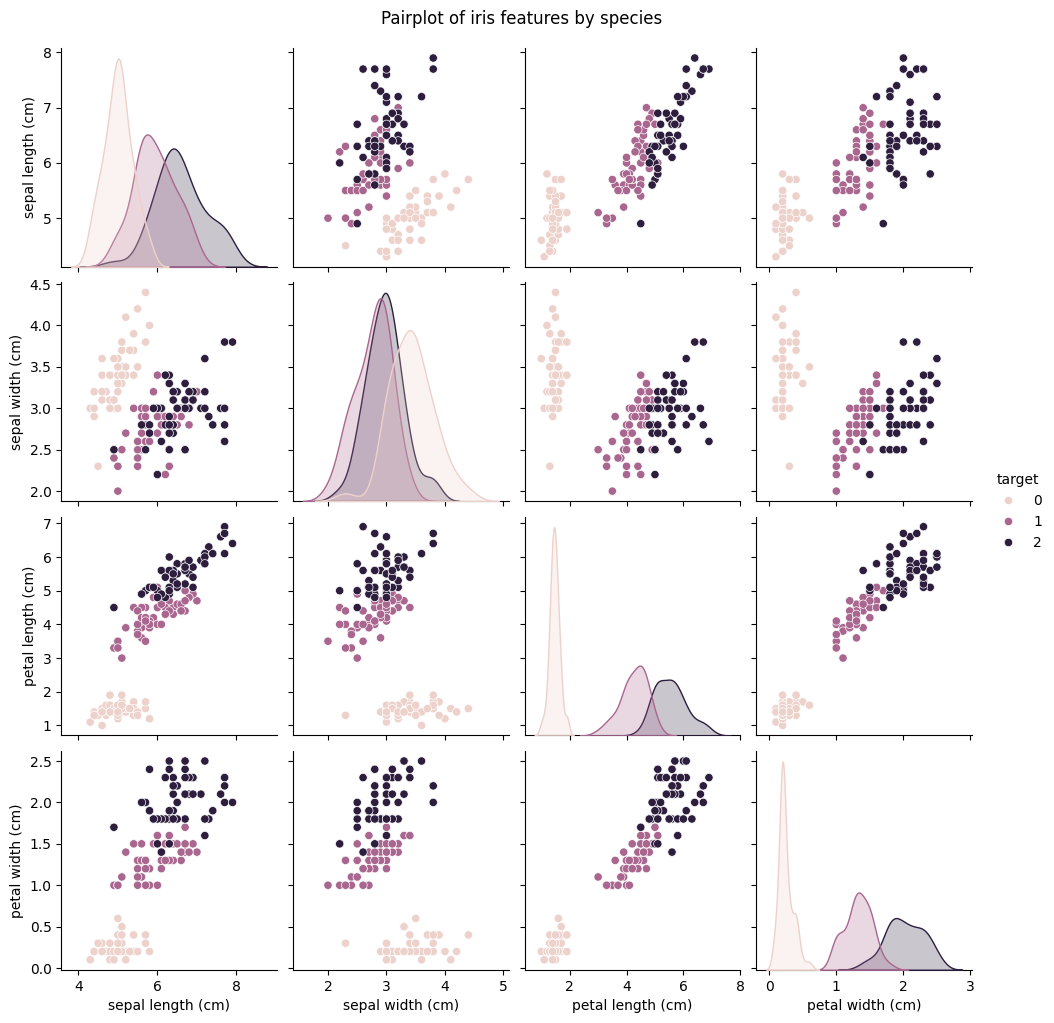

In [6]:
sns.pairplot(df, hue='target', diag_kind='kde')
plt.suptitle('Pairplot of iris features by species', y=1.02)

plt.show()

Step 3: Split Data into Training and Testing

In [7]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


Step 4: Train Decision Tree Classifier

In [10]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

y_pred_tree = dtree.predict(X_test)

Step 5: Train Random Forest Classifier

In [11]:
rforest = RandomForestClassifier(random_state = 42, n_estimators=100)
rforest.fit(X_train, y_train)

y_pred_forest = rforest.predict(X_test)

Step 6: Evaluate Both Models

In [12]:
print("Decision Tree Classifier Accuracy:", accuracy_score(y_test, y_pred_tree))

print("Random Forest Classifier Accuracy:", accuracy_score(y_test, y_pred_forest))


print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_forest))

Decision Tree Classifier Accuracy: 1.0
Random Forest Classifier Accuracy: 1.0

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Step 7: Feature Importance from Random Forest

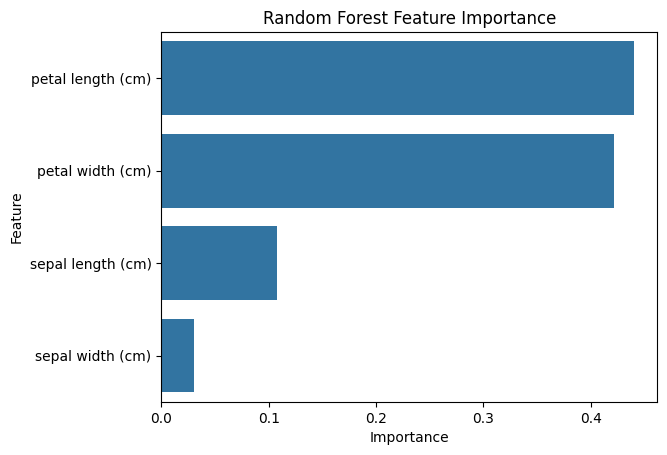

In [14]:
importances = rforest.feature_importances_
feat_names = X.columns

feat_imp_df = pd.DataFrame({'Feature': feat_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by= 'Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title('Random Forest Feature Importance')
plt.show()